# Data Wrangling Template

## Gather

### Gathering Resources
#### 1 - downolad "twitter-archive-enhanced.csv" from course resources then move it from download folder to the project folder


#### 2- read "image_predictions.tsv" programmatically using requests

In [8]:
import pandas as pd
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# execute the request with url and get content
r = requests.get(url)
# write this content in a ".tsv" file
f = open('image-predictions.tsv', 'wb').write(r.content)
image_predictions_df = pd.read_csv("image-predictions.tsv", sep='\t')

#### 3- Creat "tweet_json.txt" programmatically using Tweepy API and getting important info [tweet_id, retweet_count, favourits]

In [17]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = '#'
consumer_secret = '#'
access_token = '#'
access_secret = '#'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
df_1 = pd.read_csv("twitter-archive-enhanced.csv")
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [72]:
# IDs of failed tweets
list(fails_dict.keys())

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 851953902622658560,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 775096608509886464,
 770743923962707968,
 754011816964026368,
 680055455951884288]

In [11]:
# Getting likes count and retweet count for each tweet From 'tweet_json.txt' 
tweets_file = open('tweet_json.txt', 'r')
tweets_json = tweets_file.readlines()
tweets_file.close()
tweets = []
for tweet in tweets_json:
    tweet_id = int(json.loads(tweet)['id'])
    favourit_count = int(json.loads(tweet)['favorite_count'])
    retweet_count = int(json.loads(tweet)['retweet_count'])
    tweets.append({'tweet_id': tweet_id,
                        'favourit_count': favourit_count,
                        'retweet_count': retweet_count
                       })

In [12]:
tweets_df = pd.DataFrame(tweets, columns = ['tweet_id', 'favourit_count', 'retweet_count'])

In [13]:
# 
tweets_df.to_csv('tweets.csv',encoding='utf-8',index=False)

### now we gathered all neede data into three DateFrames
 - df_1
 - tweets_df
 - image_predictions_df

## Assess

In [18]:
# Showing sample of 10 rows from tweets data frame 
df_1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1492,692828166163931137,NaN,NaN,2016-01-28 21:54:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper just descended from heaven. 12/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692828166...,12,10,None,None,None,pupper,None
559,803276597545603072,NaN,NaN,2016-11-28 16:37:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. His selfie game is legendary....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803276597...,11,10,Winston,None,None,None,None
1696,681242418453299201,NaN,NaN,2015-12-27 22:37:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Champ. He's being sacrificed to the Az...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681242418...,10,10,Champ,None,None,None,None
2170,669351434509529089,NaN,NaN,2015-11-25 03:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sully. He's a Leviticus Galapagos. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669351434...,10,10,Sully,None,None,None,None
2076,670838202509447168,NaN,NaN,2015-11-29 05:34:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pink dogs here. Unreasonably long necks. Left ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670838202...,4,10,None,None,None,None,None
244,846042936437604353,NaN,NaN,2017-03-26 16:55:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jarvis. The snow pupsets him. Officially ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/846042936...,12,10,Jarvis,None,None,None,None
1407,699079609774645248,NaN,NaN,2016-02-15 03:55:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Reagan. He's a Persnicketus Derpson. Grea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699079609...,8,10,Reagan,None,None,None,None
1616,685198997565345792,NaN,NaN,2016-01-07 20:39:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. That is his time machine. He's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685198997...,11,10,Alfie,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
1345,704491224099647488,7.044857e+17,28785486.0,2016-03-01 02:19:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 hero af\n@ABC,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None


We have alot of NaNs at ['in_reply_to_status_id, in_reply_to_user_id]

In [19]:
# Show Sample of 10 row
image_predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
746,687664829264453632,https://pbs.twimg.com/media/CYsTg1XUsAEPjxE.jpg,1,pug,0.957365,True,French_bulldog,0.038559,True,toy_poodle,0.000667,True
1806,832369877331693569,https://pbs.twimg.com/media/C40r_GDWAAA5vNJ.jpg,1,kelpie,0.504690,True,German_short-haired_pointer,0.105208,True,Staffordshire_bullterrier,0.054338,True
673,683357973142474752,https://pbs.twimg.com/media/CXvGbWeWMAcRbyJ.jpg,1,Pembroke,0.406509,True,Cardigan,0.154854,True,Siberian_husky,0.136366,True
1863,842846295480000512,https://pbs.twimg.com/media/C7JkO0rX0AErh7X.jpg,1,Labrador_retriever,0.461076,True,golden_retriever,0.154946,True,Chihuahua,0.110249,True
1017,709918798883774466,https://pbs.twimg.com/media/CdojYQmW8AApv4h.jpg,2,Pembroke,0.956222,True,Cardigan,0.020727,True,Chihuahua,0.007912,True
1797,831552930092285952,https://pbs.twimg.com/media/C4pE-I0WQAABveu.jpg,1,Chihuahua,0.257415,True,Pembroke,0.161442,True,French_bulldog,0.092143,True
603,679844490799091713,https://pbs.twimg.com/media/CW9K9VeVAAE0j-x.jpg,1,Airedale,0.903832,True,Border_terrier,0.034713,True,toy_poodle,0.021378,True
1911,853639147608842240,https://pbs.twimg.com/media/C9i8RhhXoAAdkMT.jpg,1,German_shepherd,0.509879,True,malinois,0.237311,True,kelpie,0.046916,True
799,691321916024623104,https://pbs.twimg.com/media/CZgRmk0UcAAxeuQ.jpg,1,Rottweiler,0.508981,True,German_shepherd,0.207897,True,kelpie,0.094353,True
1117,725786712245440512,https://pbs.twimg.com/media/ChKDKmIWIAIJP_e.jpg,1,chow,0.335761,True,Samoyed,0.167173,True,kuvasz,0.145715,True


In [20]:
tweets_df.sample(10)

,tweet_id,favourit_count,retweet_count
2091,670434127938719744,1396,652
203,851861385021730816,0,22
39,884562892145688576,23499,4495
798,770772759874076672,5412,1502
865,760153949710192640,0,32
514,808106460588765185,9221,2367
954,750041628174217216,3289,651
1557,687317306314240000,20738,9549
923,752682090207055872,6206,1691
617,793601777308463104,8417,1749


In [21]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### We have 
- 78 non-null for in_reply_to_user_id and in_reply_to_status_id
- 181 duplicated tweets
- timpestamp is an object not datetime
- doggo, floofer, pupper and puppo have exactly the same number of non-null values tweet_id although they have alot of None values which means that they can be merged in one column

In [22]:
df_1[(df_1['doggo'] != 'None')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 9 to 1204
Data columns (total 17 columns):
tweet_id                      97 non-null int64
in_reply_to_status_id         4 non-null float64
in_reply_to_user_id           4 non-null float64
timestamp                     97 non-null object
source                        97 non-null object
text                          97 non-null object
retweeted_status_id           10 non-null float64
retweeted_status_user_id      10 non-null float64
retweeted_status_timestamp    10 non-null object
expanded_urls                 94 non-null object
rating_numerator              97 non-null int64
rating_denominator            97 non-null int64
name                          97 non-null object
doggo                         97 non-null object
floofer                       97 non-null object
pupper                        97 non-null object
puppo                         97 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 13.6+ KB

In [23]:
df_1[(df_1['doggo'] != 'None')& (df_1['pupper'] != 'None')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 460 to 1113
Data columns (total 17 columns):
tweet_id                      12 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     12 non-null object
source                        12 non-null object
text                          12 non-null object
retweeted_status_id           2 non-null float64
retweeted_status_user_id      2 non-null float64
retweeted_status_timestamp    2 non-null object
expanded_urls                 12 non-null object
rating_numerator              12 non-null int64
rating_denominator            12 non-null int64
name                          12 non-null object
doggo                         12 non-null object
floofer                       12 non-null object
pupper                        12 non-null object
puppo                         12 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 1.7+ KB


At First, I thought that if the tweet have value in one of these doggo, floofer, pupper and puppo so, the other three will be None. which is compeletly wrong!!
that means the tweet may have more than just one dog

In [24]:
# Noticed that there are strange values related to the column 'Name' so, 
# Here we will see all names and their count 
df_1['name'].value_counts()

None            745
a                55
Charlie          12
Lucy             11
Cooper           11
Oliver           11
Lola             10
Penny            10
Tucker           10
Winston           9
Bo                9
the               8
Sadie             8
Toby              7
Daisy             7
an                7
Bailey            7
Buddy             7
Koda              6
Milo              6
Stanley           6
Bella             6
Dave              6
Leo               6
Rusty             6
Jax               6
Oscar             6
Jack              6
Scout             6
Bentley           5
               ... 
Tyrus             1
Poppy             1
Pawnd             1
Iggy              1
Jay               1
Flash             1
Miley             1
Angel             1
Trigger           1
Trevith           1
Craig             1
Skittles          1
Swagger           1
Lassie            1
Tove              1
Freddery          1
Sully             1
Maya              1
Cannon            1


Exactly !! 
We were right there are alot of strange names like 'the', 'a', 'an', etc...

In [25]:
# supposed that rating numerator values should be in range from 0-10 but we saw something wrong 
# let's check that
df_1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

What?? Did you see that?
12 is the most rate Is that normal. what about these values 960, 420, 1776, ... Is that normal to?
Absluotly No.
So we will check the rating_denominator

In [26]:
df_1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Almost all values are equal to 10 

In [27]:
# getting info about the three dataframes
df_1.info()
print('------------------------------------------')
tweets_df.info()
print('------------------------------------------')
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

tweet id is the common attribute in the three dataframes.

there are three algorithms results p1, p2 and p3 in 

### Quality Issues
1. some columns in df_1 hae empty values like(in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
- There are retweets present and they need to be removed
- There are strange names in column "name" in df_1 like('a', 'just', 'the', 'an') 
- 2075 rows in image_predict but 2356 in df_1 which means missing images
- The numerator and denominator columns have unexpected values
- timestamp is object not timestamp
- Reducing the 3 algorithms that predict the Breed of the dog in the image to the most likely
- Extract the gender of a dog from the text column

### Tidiness
1. the data existed in more than one source (3 DataFrames)
- doggo, floffer, pupper, and puppo columns can be reprsented in one column

## Clean

### Define
Our Data comes from three data frames and we are gonna merge them in one master dataframe

### Code

Merging 3 Data Frames into one using tweet_id column

In [28]:
merged_df = pd.merge(df_1, image_predictions_df, on='tweet_id', how='left')

In [29]:
merged_df = pd.merge(merged_df, tweets_df, on='tweet_id', how='left')

### Test

In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

In [31]:
merged_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favourit_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,37419.0,8124.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,32149.0,6017.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,24236.0,3983.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,40722.0,8288.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,38952.0,8976.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,19566.0,2981.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,11429.0,1976.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,63073.0,18072.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,26920.0,4088.0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,30857.0,7056.0


### Define
we need to remove retweets
we will drop any row that 'retweeted_status_id' has a value on it

### Code

In [32]:
no_retweet_df = merged_df[merged_df.retweeted_status_id.isnull()].copy()

### Test

In [33]:
no_retweet_df.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
jpg_url                       1994 non

Now, 'retweeted_status_id' became 0 non-null values

### Define
We have to remove tweets with no image predection
Dropping any row where 'jpg_url' has a value != NAN

### Code

In [34]:
no_img_df = no_retweet_df.copy()
no_img_df[no_img_df['jpg_url'].isnull()][['tweet_id', 'jpg_url']]

,tweet_id,jpg_url
30,886267009285017600,NaN
35,885518971528720385,NaN
42,884247878851493888,NaN
55,881633300179243008,NaN
64,879674319642796034,NaN
72,878604707211726852,NaN
83,876537666061221889,NaN
88,875097192612077568,NaN
110,871102520638267392,NaN
113,870726314365509632,NaN


In [35]:
# Getting all ids
NaN_ids = no_img_df[no_img_df['jpg_url'].isnull()][['tweet_id',]].values
for i in NaN_ids:
    no_img_df = no_img_df[no_img_df['tweet_id'] != i[0]]

### Test

In [36]:
no_img_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       1994 non

Drop Empty columns

In [37]:
no_img_df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

### Test

In [38]:
no_img_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                    

### Define
Remove reply tweets
### Code

In [39]:
no_replies_df = no_img_df[no_img_df.in_reply_to_status_id.isnull()].copy()

### Test

In [40]:
no_replies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 1971 non-null int64
in_reply_to_status_id    0 non-null float64
in_reply_to_user_id      0 non-null float64
timestamp                1971 non-null object
source                   1971 non-null object
text                     1971 non-null object
expanded_urls            1971 non-null object
rating_numerator         1971 non-null int64
rating_denominator       1971 non-null int64
name                     1971 non-null object
doggo                    1971 non-null object
floofer                  1971 non-null object
pupper                   1971 non-null object
puppo                    1971 non-null object
jpg_url                  1971 non-null object
img_num                  1971 non-null float64
p1                       1971 non-null object
p1_conf                  1971 non-null float64
p1_dog                   1971 non-null object
p2                      

In [41]:
no_replies_df.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)

In [42]:
no_replies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-nu

### Define 
doggo, floffer, pupper, and puppo columns can be reprsented in one column "dog_type"
### Code

In [43]:
dog_type = []
df_with_dog_type = no_replies_df.copy()
string_in = ['puppo', 'pupper', 'doggo', 'floof']
string_out = ['puppo', 'pupper', 'doggo', 'floofer']

for row in df_with_dog_type['text']:
    isNone = True
    dogs = []
    row = row.lower()
    for word in string_in:
        if word in str(row):
            isNone = False
            dogs.append(string_out[string_in.index(word)])
    
    if isNone:
        dog_type.append('None')
    else:
        dog_type.append(', '.join(dogs))
        
df_with_dog_type['dog_type'] = dog_type


### Test

In [44]:
df_with_dog_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-nu

In [45]:
df_with_dog_type['dog_type'].value_counts()

None               1606
pupper              224
doggo                67
floofer              34
puppo                27
pupper, doggo         8
puppo, doggo          2
doggo, floofer        2
pupper, floofer       1
Name: dog_type, dtype: int64

### Define
Convert timestamp to datetime
### Code

In [46]:
time_stamp_edited_df = df_with_dog_type.copy()
time_stamp_edited_df['timestamp'] = pd.to_datetime(time_stamp_edited_df['timestamp'])

### Test

In [47]:
time_stamp_edited_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    197

In [48]:
#now I can delete those redundant columns
time_stamp_edited_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [49]:
time_stamp_edited_df.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favourit_count,retweet_count,dog_type
712,784431430411685888,2016-10-07 16:33:21,"<a href=""http://twitter.com/download/iphone"" r...",This is Stormy. He's curly af. Already pupared...,https://twitter.com/dog_rates/status/784431430...,12,10,Stormy,https://pbs.twimg.com/media/CuLcNkCXgAEIwK2.jpg,1.0,...,True,toy_poodle,0.243192,True,standard_poodle,0.010920,True,5988.0,1377.0,None
711,784517518371221505,2016-10-07 22:15:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Frankie. He has yet to learn how to co...,https://twitter.com/dog_rates/status/784517518...,11,10,Frankie,https://pbs.twimg.com/media/CuMqhGrXYAQwRqU.jpg,2.0,...,True,Eskimo_dog,0.151248,True,Siberian_husky,0.084840,True,9414.0,2717.0,None
1211,715360349751484417,2016-03-31 02:09:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Bertson. He just wants to say hi. 11/1...,https://twitter.com/dog_rates/status/715360349...,11,10,Bertson,https://pbs.twimg.com/media/Ce14cOvWwAAcFJH.jpg,1.0,...,False,screw,0.073277,False,padlock,0.023970,False,5610.0,1633.0,None
1519,690735892932222976,2016-01-23 03:20:44,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Peaches. She's a Dingleberry Zand...,https://twitter.com/dog_rates/status/690735892...,13,10,Peaches,https://pbs.twimg.com/media/CZX8nyeVAAEstKM.jpg,1.0,...,True,Labrador_retriever,0.109635,True,kuvasz,0.002795,True,3903.0,1327.0,floofer
503,813066809284972545,2016-12-25 17:00:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Tyr. He is disgusted by holiday traffi...,https://twitter.com/dog_rates/status/813066809...,12,10,Tyr,https://pbs.twimg.com/media/C0iX8OOVEAEIpMC.jpg,1.0,...,True,Pembroke,0.115034,True,basenji,0.048873,True,8371.0,2087.0,None
2024,671891728106971137,2015-12-02 03:20:45,"<a href=""http://twitter.com/download/iphone"" r...",This is Mojo. Apparently he's too cute for a s...,https://twitter.com/dog_rates/status/671891728...,11,10,Mojo,https://pbs.twimg.com/media/CVMJ9guXAAAhAiK.jpg,1.0,...,True,golden_retriever,0.349401,True,seat_belt,0.069396,False,1328.0,578.0,None
471,816697700272001025,2017-01-04 17:27:59,"<a href=""http://twitter.com/download/iphone"" r...",This is Binky. She appears to be rather h*ckin...,https://twitter.com/dog_rates/status/816697700...,12,10,Binky,https://pbs.twimg.com/media/C1V-K63UAAEUHqw.jpg,1.0,...,True,Pomeranian,0.052850,True,Maltese_dog,0.047608,True,10266.0,2351.0,None
1454,695446424020918272,2016-02-05 03:18:42,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate unicorns but this one h...,https://twitter.com/dog_rates/status/695446424...,12,10,None,https://pbs.twimg.com/media/Caa407jWwAAJPH3.jpg,1.0,...,True,Cardigan,0.121102,True,Pembroke,0.111767,True,4515.0,1890.0,None
1539,689661964914655233,2016-01-20 04:13:20,"<a href=""http://twitter.com/download/iphone"" r...",Meet Luca. He's a Butternut Scooperfloof. Glor...,https://twitter.com/dog_rates/status/689661964...,12,10,Luca,https://pbs.twimg.com/media/CZIr5gFUsAAvnif.jpg,1.0,...,True,whippet,0.246966,True,Chihuahua,0.122541,True,3298.0,966.0,floofer
1068,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3.0,...,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,35880.0,13883.0,None


In [50]:
time_stamp_edited_df['rating_denominator'].describe()

count    1971.000000
mean       10.477423
std         6.853275
min         2.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

### Define
Reducing the 3 algorithms that predict the Breed of the dog in the image to the most likely
### Code

In [51]:
breed = []
confidence = []

def breed_confidence(row):
    vals = []
    flag = False
    if row['p1_dog'] == True:
        if row['p1_conf'] <= 1:
            vals.append((1, row['p1_conf']))
            flag = True
    if row['p2_dog'] == True:
        if row['p2_conf'] <= 1:
            vals.append((2, row['p2_conf']))
            flag = True
    if row['p3_dog'] == True:
        if row['p3_conf'] <= 1:
            vals.append((3, row['p3_conf']))
            flag = True
            
    if not flag:
        breed.append('None')
        confidence.append(0)
    else:
        m = 0
        c = 0
        for i, j in vals:
            if j > m:
                m = j
                c = i
        breed.append(row['p'+str(c)])

        confidence.append(row['p'+str(c)+'_conf'])
        
reduced_df = time_stamp_edited_df.copy()
reduced_df.apply(breed_confidence, axis=1)

# add lists created to master dataframe
reduced_df['breed'] = breed
reduced_df['confidence'] = confidence

### Test

In [52]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null object
favourit_count        1965 non-null float64
retweet_count         1

In [53]:
reduced_df.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

In [54]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
jpg_url               1971 non-null object
favourit_count        1965 non-null float64
retweet_count         1965 non-null float64
dog_type              1971 non-null object
breed                 1971 non-null object
confidence            1971 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 231.0+ KB


### Define
##### Edit Strange Names
the most of strange names starts with small letter so we can remove any name start with small letter
### Code

In [55]:
names=[]

def incorrect_name(row):
    if row['name'][0].islower() == True:
        names.append('None')
    else:
        names.append(row['name'])
        
names_edited_df = reduced_df.copy()
names_edited_df.apply(incorrect_name, axis=1)

names_edited_df['names'] = names

### Test


In [56]:
# Check names
names_edited_df['names'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

### Define
Correct 'rating_numerator','rating_denominator' values and create new 'rating' column
### Code
First, we check decimal ratings

In [57]:
names_edited_df[names_edited_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\Figo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1712,Here we have uncovered an entire battalion of ...,26


In [58]:
# Conver the two columns to float
names_edited_df['rating_numerator']=names_edited_df.rating_numerator.astype(float)
names_edited_df['rating_denominator']=names_edited_df.rating_denominator.astype(float)
names_edited_df[names_edited_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator']]

C:\Users\Figo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


,tweet_id,text,rating_numerator
45,883482846933004288,This is Bella. She hopes her smile made you sm...,5.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",75.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1712,680494726643068929,Here we have uncovered an entire battalion of ...,26.0


In [59]:
# Get rows with rating_denominator != 10
pd.set_option('display.max_colwidth', -1)
names_edited_df.loc[names_edited_df.rating_denominator!=10.0,['tweet_id', 'text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0


In [60]:
# Drop therow that not contains any rating
clean_df=names_edited_df[names_edited_df.tweet_id!=810984652412424192].copy()

In [61]:
# Edit the rating issues manually
clean_df.loc[clean_df.tweet_id==740373189193256964,['rating_numerator','rating_denominator']]=[14.0,10.0]
clean_df.loc[clean_df.tweet_id==722974582966214656,['rating_numerator','rating_denominator']]=[13.0,10.0]
clean_df.loc[clean_df.tweet_id==716439118184652801,['rating_numerator','rating_denominator']]=[11.0,10.0]
clean_df.loc[clean_df.tweet_id==682962037429899265,['rating_numerator','rating_denominator']]=[10.0,10.0]
clean_df.loc[clean_df.tweet_id==666287406224695296,['rating_numerator','rating_denominator']]=[9.0,10.0]
clean_df.loc[clean_df.tweet_id==883482846933004288,['rating_numerator','rating_denominator']]=[13.5,10.0]
clean_df.loc[clean_df.tweet_id==786709082849828864,['rating_numerator','rating_denominator']]=[9.75,10.0]
clean_df.loc[clean_df.tweet_id==778027034220126208,['rating_numerator','rating_denominator']]=[11.27,10.0]
clean_df.loc[clean_df.tweet_id==680494726643068929,['rating_numerator','rating_denominator']]=[11.26,10.0]

In [62]:
# Creating the new Column rating
clean_df['rating'] = clean_df['rating_numerator'] / clean_df['rating_denominator']

In [63]:
# Drop unneccssary columns
clean_df=clean_df.drop(['rating_numerator','rating_denominator'],axis=1)

In [64]:
clean_df['rating'].value_counts()

1.200      450
1.000      419
1.100      398
1.300      254
0.900      151
0.800      95 
0.700      51 
1.400      34 
0.500      32 
0.600      32 
0.300      19 
0.400      15 
0.200      9  
0.100      4  
1.127      1  
1.350      1  
1.126      1  
0.975      1  
42.000     1  
177.600    1  
0.000      1  
Name: rating, dtype: int64

There is two strange values 42 and 177

In [65]:

clean_df.loc[clean_df.rating>2,['tweet_id','text','rating']]

,tweet_id,text,rating
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,177.6
2074,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,42.0


In [66]:
clean_df=clean_df[clean_df.rating<2]

### Test

In [67]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id          1968 non-null int64
timestamp         1968 non-null datetime64[ns]
source            1968 non-null object
text              1968 non-null object
expanded_urls     1968 non-null object
name              1968 non-null object
jpg_url           1968 non-null object
favourit_count    1962 non-null float64
retweet_count     1962 non-null float64
dog_type          1968 non-null object
breed             1968 non-null object
confidence        1968 non-null float64
names             1968 non-null object
rating            1968 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(8)
memory usage: 230.6+ KB


### Define
Extract the gender of a dog from the text column by using function that match can some keywords with the text to know if the gender is male, female, both or None of them.

### Code

In [68]:
m_keys = ['he', 'his', "he's", 'him', 'himself']
f_keys = ['she', 'her', "she's", 'herself']
def get_gender(txt):
    m = False
    f = False
    for word in txt:
        if word.lower() in m_keys:
            m = True
        if word.lower() in f_keys:
            f = True
    if m and f:
        return "both"
    elif m and not f:
        return "male"
    elif f and not m:
        return "female"
    else:
        return "None"

In [69]:
clean_df['text']=clean_df['text'].str.replace('.', '')
clean_df['text']=clean_df['text'].str.replace(',', '')
clean_df['gender']=clean_df['text'].str.split(" ").apply(get_gender)

### Test

In [70]:
clean_df[['text', 'gender']].head(5)

,text,gender
0,This is Phineas He's a mystical boy Only ever appears in the hole of a donut 13/10 https://tco/MgUWQ76dJU,male
1,This is Tilly She's just checking pup on you Hopes you're doing ok If not she's available for pats snugs boops the whole bit 13/10 https://tco/0Xxu71qeIV,female
2,This is Archie He is a rare Norwegian Pouncing Corgo Lives in the tall grass You never know when one may strike 12/10 https://tco/wUnZnhtVJB,male
3,This is Darla She commenced a snooze mid meal 13/10 happens to the best of us https://tco/tD36da7qLQ,female
4,"This is Franklin He would like you to stop calling him ""cute"" He is a very fierce shark and should be respected as such 12/10 #BarkWeek https://tco/AtUZn91f7f",male


In [71]:
clean_df.loc[clean_df.gender == 'both', ['text', 'gender']]

,text,gender
361,This is Leo He was a skater pup She said see ya later pup He wasn't good enough for her 12/10 you're good enough for me Leo https://tco/Xw9JbJHTul,both
365,This is Dexter He was reunited with his mom yesterday after she was stuck in Iran during the travel Bannon 13/10 welcome home https://tco/U50RlRw4is,both
781,This girl straight up rejected a guy because he doesn't like dogs She is my hero and I give her 13/10 https://tco/J39lT3b0rH,both
1386,This is Vincent He's the man your girl is with when she's not with you 10/10 https://tco/JQGMP7kzjD,both
2064,Meet Holly She's trying to teach small human-like pup about blocks but he's not paying attention smh 11/10 &amp; 8/10 https://tco/RcksaUrGNu,both


## Store Data

In [72]:
master_df = clean_df.copy()
master_df.to_csv('twitter_archive_master.csv', index=False)

# Analysis & Visualizations

In [73]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [74]:
master_df.describe()

,tweet_id,favourit_count,retweet_count,confidence,rating
count,1.968000e+03,1962.000000,1962.000000,1968.000000,1968.000000
mean,7.360298e+17,8586.573904,2596.702854,0.466487,1.054816
std,6.754171e+16,12621.572048,4647.755402,0.339419,0.216563
min,6.660209e+17,75.000000,11.000000,0.000000,0.000000
25%,6.758719e+17,1837.500000,578.000000,0.142030,1.000000
50%,7.088226e+17,3867.500000,1245.000000,0.461120,1.100000
75%,7.880674e+17,10714.000000,2969.000000,0.776849,1.200000
max,8.924206e+17,161577.000000,81918.000000,0.999956,1.400000


In [75]:
master_df[['favourit_count', 'retweet_count', 'rating']].describe()

,favourit_count,retweet_count,rating
count,1962.000000,1962.000000,1968.000000
mean,8586.573904,2596.702854,1.054816
std,12621.572048,4647.755402,0.216563
min,75.000000,11.000000,0.000000
25%,1837.500000,578.000000,1.000000
50%,3867.500000,1245.000000,1.100000
75%,10714.000000,2969.000000,1.200000
max,161577.000000,81918.000000,1.400000


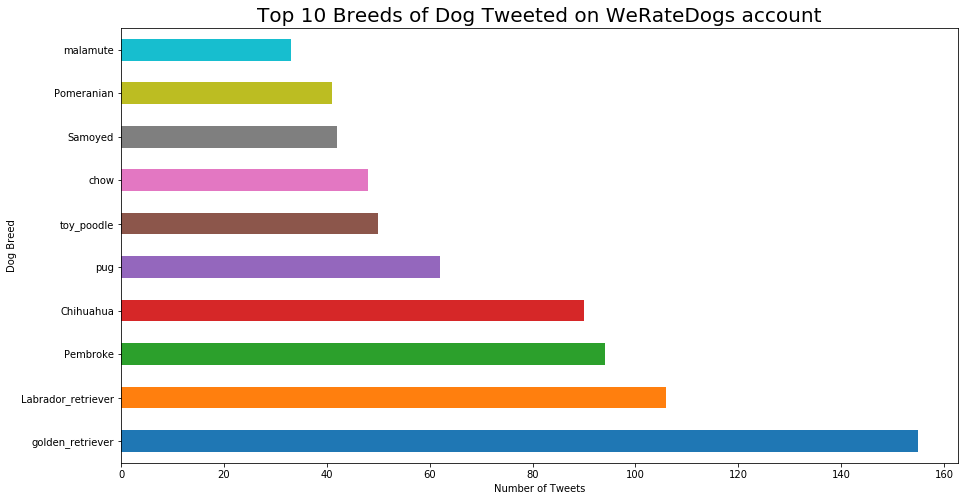

In [76]:
fig = plt.figure(figsize=(15,8))
master_df[master_df.breed != 'None'].groupby('breed').count()['rating'].sort_values(ascending=False).nlargest(10).plot(kind='barh')
plt.title("Top 10 Breeds of Dog Tweeted on WeRateDogs account",fontsize=20)
plt.ylabel("Dog Breed")
plt.xlabel("Number of Tweets");

,stage,number,rating,retweet,favorite
0,doggo,67,1.18657,6571.58,18552.4
1,puppo,27,1.21111,5992.19,21579.2
2,floofer,34,1.17059,2665.26,8611.74
3,pupper,224,1.0605,2162.12,6798.16
4,"puppo, doggo",2,1.3,10720,30505
5,"doggo, floofer",2,0.95,3482,13825.5
6,"pupper, doggo",8,1.1,4222.38,13540.9
7,"pupper, floofer",1,1.1,1418,4270


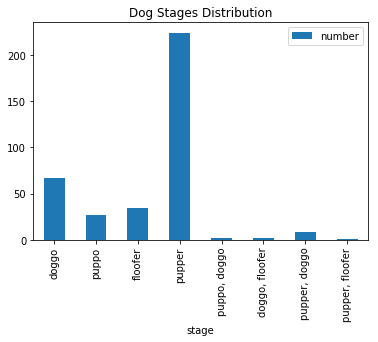

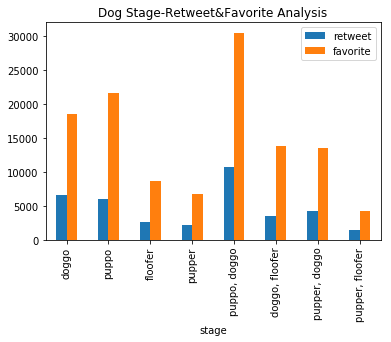

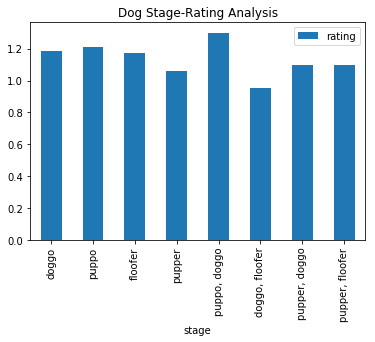

In [77]:
stage_analyze=pd.DataFrame(columns=['stage','number','rating','retweet','favorite'])
stages = list(master_df.dog_type.unique())
stages.remove('None')
stage_analyze['stage'] = stages
for each_stage in stage_analyze.stage:
    stage_df=master_df[master_df.dog_type==each_stage]
    stage_analyze.loc[stage_analyze.stage== each_stage,'number']=stage_df.shape[0]
    stage_analyze.loc[stage_analyze.stage== each_stage,'rating']=stage_df['rating'].mean()
    stage_analyze.loc[stage_analyze.stage== each_stage,'retweet']=stage_df['retweet_count'].mean()
    stage_analyze.loc[stage_analyze.stage== each_stage,'favorite']=stage_df['favourit_count'].mean()
stage_analyze[['stage','number']].plot(x='stage',kind='bar',title='Dog Stages Distribution')
stage_analyze[['stage','retweet','favorite']].plot(x='stage',kind='bar',title='Dog Stage-Retweet&Favorite Analysis')
stage_analyze[['stage','rating']].plot(x='stage',kind='bar',title='Dog Stage-Rating Analysis')
stage_analyze

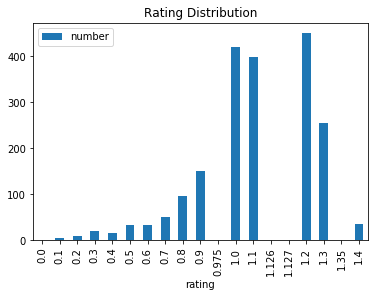

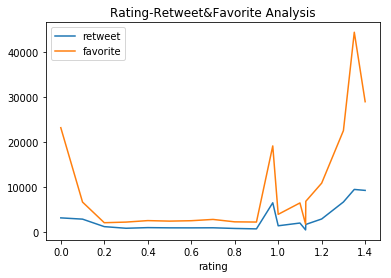

In [78]:
import numpy as np
values=np.sort(master_df.rating.unique())
rating_analyze=pd.DataFrame(columns=['rating','number','retweet','favorite'])
rating_analyze['rating']=values
for x in rating_analyze['rating']:
    this_df=master_df[master_df.rating==x]
    rating_analyze.loc[rating_analyze.rating==x,'number']=this_df['tweet_id'].count()
    rating_analyze.loc[rating_analyze.rating==x,'retweet']=this_df.retweet_count.mean()
    rating_analyze.loc[rating_analyze.rating==x,'favorite']=this_df.favourit_count.mean()
rating_analyze[['rating','number']].plot(x='rating',kind='bar', title='Rating Distribution')
rating_analyze[['rating','retweet','favorite']].plot(x='rating',title='Rating-Retweet&Favorite Analysis')

In [79]:
max_fav = master_df.favourit_count.max()
max_re = master_df.retweet_count.max()

In [80]:
master_df[master_df.favourit_count==max_fav][['tweet_id', 'jpg_url', 'favourit_count']]

,tweet_id,jpg_url,favourit_count
1039,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,161577.0


In [81]:
master_df[master_df.retweet_count==max_re][['tweet_id', 'jpg_url', 'retweet_count']]

,tweet_id,jpg_url,retweet_count
1039,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,81918.0


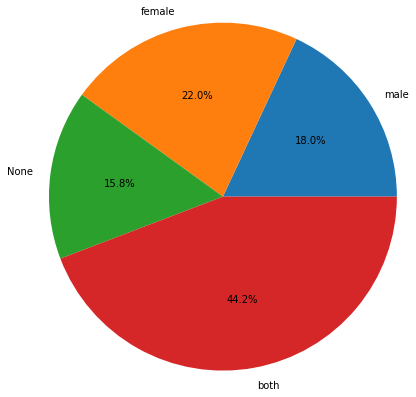

In [89]:
values=np.array(master_df.gender.unique())
gender_analyze=pd.DataFrame(columns=['gender','number','retweet','favorite'])
gender_analyze['gender']=values
for x in gender_analyze['gender']:
    this_df=master_df[master_df.gender==x]
    gender_analyze.loc[gender_analyze.gender== x,'number']=gender_analyze.shape[0]
    gender_analyze.loc[gender_analyze.gender==x,'retweet']=this_df.retweet_count.mean()
    gender_analyze.loc[gender_analyze.gender==x,'favorite']=this_df.favourit_count.mean()
gender_analyze[['gender','favorite']]
gender = gender_analyze['gender']
favorites = gender_analyze['favorite']
plt.pie(favorites, labels=gender, autopct='%.1f%%', radius=2)

plt.show()

In [83]:
### Insights

- Golden retriver has Most ratings

- Top 10 Dogs tweetef on weratedogs are (Golden Retriever, Labrador Retriever, Pembrok, Chihuahua, Pug, Toy Poodle, chow, Samoyed, Pomeranian and Malamute

- Among the 4 dog stages, pupper has the biggest frequency, but pupper also gets the lowest favorite counts and retweet counts and rating.

- the mean for rating is 1.054370 and the most rating is 1.2


SyntaxError: invalid syntax (<ipython-input-83-6ca162252e97>, line 3)